# Consistency: general construction

## Notes to computation
Let $x\in\mathcal{X}$, $z\in\mathcal{Z}$, $\theta\in\Theta$ and recall notation
<!-- $$
    C(x,z) = \max_{\theta\in\Theta} c(x,\theta) - \ell_{\beta}^{-1}(\mathcal{I}_{\theta}(z) -r),\qquad
    X(z) = \underset{x\in\mathcal{X}}{\operatorname{arg\,min\ }} \max_{\theta\in\Theta} c(x,\theta) - \ell_{\beta}^{-1}(\mathcal{I}_{\theta}(z) -r)\qquad\text{and}\qquad
    u(z) = \min_{x\in\mathcal{X}} \max_{\theta\in\Theta} c(x,\theta) - \ell_{\beta}^{-1}(\mathcal{I}_{\theta}(z) -r).
$$ -->


\begin{align*}
    G(x,z) &= \max_{\theta\in\Theta} c(x,\theta) - \ell_{\beta}^{-1}(\mathcal{I}_{\theta}(z) -r),\\
    X(z) &= \underset{x\in\mathcal{X}}{\operatorname{arg\,min\ }} \max_{\theta\in\Theta} c(x,\theta) - \ell_{\beta}^{-1}(\mathcal{I}_{\theta}(z) -r),\\
    u(z) &= \min_{x\in\mathcal{X}} \max_{\theta\in\Theta} c(x,\theta) - \ell_{\beta}^{-1}(\mathcal{I}_{\theta}(z) -r),\\
    \varphi(x,\theta) &= c(x,\theta) - \ell_{\beta}^{-1}(\mathcal{I}_{\theta}(z) -r) \qquad\text{and}\\
    \text{regret}(x,\theta)&=c(x,\theta) - \min_{y\in\mathcal{X}} c(y,\theta),
\end{align*}
where $\ell_{\beta}^{-1}$ is specified later.
We are primarely interested in the **consistency gap ($R_{\infty}$)** and **regret in the $n$-th step ($R_n$)** 
\begin{align*}
    R_{\infty} &= \text{regret}(X(Z_{\infty}(\theta_0)),\theta_0) \qquad \text{and}\quad &R_{n}&=\text{regret}(X(Z_{n}),\theta_0).\\
    &&&
\end{align*}
    <!--,\\
     & = c(X(\theta_0),\theta_0) +\frac{1}{4\rho}\theta_0^{\top}\Sigma^{-1}\theta_0 &&=c(X(Z_{n}),\theta_0) +\frac{1}{4\rho}\theta_0^{\top}\Sigma^{-1}\theta_0 -->

### $\underset{x\in\mathcal{X}}{\operatorname{arg\,min\ }} c(x,\theta)$ unique \& known in closed form

Assume that $\min_{x\in\mathcal{X}} c(x,\theta)$ has a unique solution and that there is $\nu\colon\theta\to\mathcal{X}$ such that $$\nu(\theta)=\underset{x\in\mathcal{X}}{\operatorname{arg\,min\ }} c(x,\theta)$$ and $\min_{x\in\mathcal{X}} c(x,\theta) = c(\nu(\theta),\theta)$.

Then, in order to compute $X(Z_{\infty}(\theta))$ and $X(Z_{n})$ (or any $X(z)$), we can make use of the **Sion's Minimax Theorem** (*applies ***if*** $(x,\theta)\mapsto c(x,\theta) - \ell_{\beta}^{-1}(\mathcal{I}_{\theta}(z) -r))$ is jointly continous (finite valued $\text{!!}$), strictly convex in $x$ and concave in $\theta$, while both $\mathcal{X}$ and $\Theta$ are convex and compact*) and ***Nash*** (the optimal points $x^{\star}$ and $\theta^{\star}$ can be determined independently of each other). Then, for any $z\in\mathcal{Z}$ we have
\begin{align*}
\min_{x\in\mathcal{X}} \max_{\theta\in\Theta} c(x,\theta) - \ell_{\beta}^{-1}(\mathcal{I}_{\theta}(z) -r) &= \max_{\theta\in\Theta} \min_{x\in\mathcal{X}} c(x,\theta) - \ell_{\beta}^{-1}(\mathcal{I}_{\theta}(z) -r) \\
&= \max_{\theta\in\Theta} c(\nu(\theta),\theta) - \ell_{\beta}^{-1}(\mathcal{I}_{\theta}(z) -r) \equiv \max_{\theta\in\Theta} \varphi_{\min}(\theta) = - \min_{\theta\in\Theta} - \varphi_{\min}(\theta)
\end{align*}
and we can approximate $\theta_{z}=\underset{\theta\in\Theta}{\operatorname{arg\,max\ }} c(\nu(\theta),\theta) - \ell_{\beta}^{-1}(\mathcal{I}_{\theta}(z) -r)$ numerically, so that 
\begin{align*}
    X(z) &\approx \underset{x\in\mathcal{X}}{\operatorname{arg\,min\ }} c(x,\theta_{z}) - \ell_{\beta}^{-1}(\mathcal{I}_{\theta_{z}}(z) -r) \\
    &= \underset{x\in\mathcal{X}}{\operatorname{arg\,min\ }} c(x,\theta_{z}) \\
    &= \nu(\theta_{z}).
\end{align*}
Moreover,
$$
\text{regret}(x,\theta)=c(x,\theta) - c(\nu(\theta),\theta).
$$

### $\underset{x\in\mathcal{X}}{\operatorname{arg\,min\ }} c(x,\theta)$ UNknown in closed form
Contrarily to the Gaussian example, closed form solutions for $\min_{x\in\mathcal{X}} c(x,\theta)$ are not at our disposal. Therefore, we will use a grid search algorithm. Hence, let $\mathcal{X}_{grid}\vcentcolon=(x_m)_{m=1,\ldots,M}$ be some (equidistant) grid with $M$ elements build on the set $\mathcal{X}$.

Let $z\in\mathcal{Z}$. We denote $\varphi_m(\theta)\vcentcolon = c(x_m,\theta) - \ell_{\beta}^{-1}(\mathcal{I}_{\theta}(z) -r)$. In order to compute $X(z)$ (e.g. $X(Z_{\infty}(\theta))$ or $X(Z_{n})$), we approximate 
\begin{align*}
    \theta_{z,m}&=\underset{\theta\in\Theta}{\operatorname{arg\,max\ }} c(x_m,\theta) - \ell_{\beta}^{-1}(\mathcal{I}_{\theta}(z) -r)\\
    &=\underset{\theta\in\Theta}{\operatorname{arg\,min\ }} - c(x_m,\theta) + \ell_{\beta}^{-1}(\mathcal{I}_{\theta}(z) -r)\\
    &= \underset{\theta\in\Theta}{\operatorname{arg\,min\ }} - \varphi_m(\theta)
\end{align*}
for all $m=1,\ldots,M$, so that
\begin{align*}
    X(z) &\approx \underset{x_m, \ m=1,\ldots,M}{\operatorname{arg\,min\ }} c(x_m,\theta_{z,m}) - \ell_{\beta}^{-1}(\mathcal{I}_{\theta_{z,m}}(z) -r).
\end{align*}

### Choice of $\ell_{\beta}^{-1}$
see respective fct

### Methods for comparison
1. **SAA:** (assuming $c(x,Z_n)$ well-defined $\color{red}{!?}$)
$$X_{SAA}(Z_{n}) =\underset{x\in\mathcal{X}}{\operatorname{arg\,min\ }} c(x,Z_n)\qquad \text{with}\qquad R_{SAA,n}=\text{regret}(X_{SAA}(Z_{n}),\theta_0).$$


In [ ]:
## imports
import math
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # for color maps
from scipy.optimize import minimize
import time

## document specific cell imports


In [2]:
## INPUT run select
# all cell #SAME# across consistency_general up to choices

# Plot 0: with gridX - $R_\infty$ vs. $\beta$ 
run_plot_0 = False
# Plot 4: K with gridX - Parallel Processing (PP)
run_plot_4 = True
# Plot 6: ... free ...
run_plot_6 = False
# Plot 10: withOUT gridX - $R_\infty$ vs. $\beta$ 
run_plot_10 = False
# Plot 14: K withOUT gridX - Parallel Processing (PP)
run_plot_14 = False

run_plot_list = [run_plot_0, run_plot_4, run_plot_6, run_plot_10, run_plot_14]
run_plot_numstr_list = ["0", "4", "6","10","14"]

## INPUT type select

# Is c replaced by regret? (if yes, set "type_regret = True" and keep the "c" function so that regret = c - min_x c)
type_regret = True

# Do we have to use grid_X? (if yes, set "type_gridX = True")
type_gridX = run_plot_0 or run_plot_4 or run_plot_6 # <-- currently neccesary choice

# Is \min_x c(x,\theta) known in closed form OR should it be comuted via X_grid? (if yes, set "type_minc_closedform = True")
type_minc_closedform = False # not implemented

# Is \argmin_x c(x,\theta) known in closed form? (if yes, set "type_argminc_closedform = True")
type_argminc_closedform = not type_gridX # <-- currently neccesary choice

type_list = [type_regret, type_minc_closedform, type_argminc_closedform, type_gridX]
type_str_list = ["type_regret", "type_minc_closedform", "type_argminc_closedform", "type_gridX"]
################################
### End of INPUT ###############
################################

# safeguards
if not all([isinstance(_, bool) for _ in run_plot_list]):
    sys.exit("Warning: one of the run select variables is not bool.")
if not all([isinstance(_, bool) for _ in type_list]):
    sys.exit("Warning: one of the run select variables is not bool.")
if type_minc_closedform:
    sys.exit("safeguard: code not yet ready for ... = True")
if run_plot_0 or run_plot_4 or run_plot_6:
    if not type_gridX:
        sys.exit("Warning: if run_plot_0 or run_plot_4 or run_plot_6 True, then type_gridX = True necessary.")
    if run_plot_10 or run_plot_14:
        sys.exit("Warning: run_plot_0 or run_plot_4 or run_plot_6 True is mutual exclusive with run_plot_10 or run_plot_14.")
if run_plot_10 or run_plot_14:
    if type_gridX:
        sys.exit("Warning: if run_plot_10 or run_plot_14 True, then type_gridX = False necessary.")
    if run_plot_0 or run_plot_4 or run_plot_6:
        sys.exit("Warning: run_plot_0 or run_plot_4 or run_plot_6 True is mutual exclusive with run_plot_10 or run_plot_14.")
    if type_regret:
        sys.exit("Warning: type_regret = True not implemented for run_plot_10 or run_plot_14.")


def print_select():
    run_plot_str = ""
    for j, run_plot_j, run_plot_namestr_j in zip(range(len(run_plot_list)), run_plot_list, run_plot_numstr_list):
        if j == 0:
            run_plot_str += "run_plot_"+run_plot_namestr_j+f"={run_plot_j}"
        else: 
            run_plot_str += "; run_plot_"+run_plot_namestr_j+f"={run_plot_j}"
    print(run_plot_str)
    type_str = ""
    for j, type_j, type_str_j in zip(range(len(type_list)), type_list, type_str_list):
        if j == 0:
            type_str += type_str_j+f"={type_j}"
        else: 
            type_str += "; "+type_str_j+f"={type_j}"
    print(type_str)
    print("")
print_select()

run_plot_0=False; run_plot_4=True; run_plot_6=False; run_plot_10=False; run_plot_14=False
type_regret=True; type_minc_closedform=False; type_argminc_closedform=False; type_gridX=True



## Sim setup \& INPUT boxes (**run this section!**)

In the following simulations
* $\theta_0$ denotes the true unknown parameter value.
* $N$ is the maximal path length 
* $K$ is the number of paths

### INPUT: Data generation

In [ ]:
## Robust addons
    
def sample_from_simplex_l1_ball(center, radius, size=1, eps_theta = 0.001, seed_num = False):
    """
    Uniformly sample size points from the intersection of the probability simplex
    and an L1 ball centered at center with radius radius.
    
    Inputs:
        center (np.array): A point in the vecdim-dimensional probability simplex.
        radius (float): Radius of the L1 ball.
        size (int): sizeumber of samples to generate.
    
    Returns:
        samples (list of np.array): List of valid samples.
    """
    if not seed_num == False:
        np.random.seed(seed_num)

    vecdim = len(center)
    samples = []

    while len(samples) < size:
        # Step 1: Sample from the probability simplex (using Dirichlet)
        candidate = np.random.dirichlet(np.ones(vecdim))
        
        # Step 2: Check L1 constraint
        if np.sum(np.abs(candidate - center)) <= radius:
            if np.all(candidate > eps_theta):
                samples.append(candidate)

    if size == 1:
        return samples[0]
    else:
        return samples
    
def sample_from_simplex_l2_ball(center, radius, size=1, eps_theta = 0.001, seed_num = False):
    """
    Uniformly sample size points from the intersection of the probability simplex
    and an L2 ball centered at center with radius radius.
    
    Inputs:
        center (np.array): A point in the vecdim-dimensional probability simplex.
        radius (float): Radius of the L2 ball.
        size (int): sizeumber of samples to generate.
    
    Returns:
        samples (list of np.array): List of valid samples.
    """
    if not seed_num == False:
        np.random.seed(seed_num)

    vecdim = len(center)
    samples = []

    while len(samples) < size:
        # Step 1: Sample from the probability simplex (using Dirichlet)
        candidate = np.random.dirichlet(np.ones(vecdim))
        
        # Step 2: Check L2 constraint
        if np.linalg.norm(candidate - center) <= radius:
            if np.all(candidate > eps_theta):
                # if np.sum(candidate) == 1:
                samples.append(candidate)

    if size == 1:
        return samples[0]
    else:
        return samples
    

In [ ]:
def sample_from_list(utheta_list, prob_vector, seed_num = False):
    if not seed_num == False:
        np.random.seed(seed_num)
    
    utheta_num = len(utheta_list)
    sample = np.random.choice(np.arange(0, utheta_num), p=prob_vector)
    return utheta_list[sample]

In [ ]:
## INPUT set data parameters and seed
d = 8
N = 800
K = 300

B_theta_zero_radius = 0.07
# B_theta_string = r' ($B_s(\theta_{0})$ is $L_1$, $s$ = '+f"{B_theta_zero_radius})"
B_theta_string = r' ($B_s(\theta_{0})$ is $L_2$, $s$ = '+f"{B_theta_zero_radius})"

eps_theta = 0.001

np.random.seed(42)

## INPUT generate/set theta_zero
if d == 3:
    theta_zero = np.array([0.6, 0.05, 0.35])
elif d == 4:
    theta_zero = np.array([0.2, 0.4, 0.05, 0.35])
elif d == 5:
    theta_zero = np.array([0.15, 0.17, 0.35, 0.13, 0.20])
elif d == 6:
    theta_zero = np.array([0.07, 0.12, 0.35, 0.1, 0.28,0.08])
elif d == 8:
    theta_zero = np.array([0.115, 0.115, 0.115, 0.125, 0.135, 0.135, 0.135, 0.125])
    k_theta_zero = 1
    p_theta_zero = 1.65
    rho_theta_zero = 0.0025 # 0.05*(0.05)
elif d == 10:
    theta_zero = np.array([0.04, 0.15, 0.12, 0.07, 0.09, 0.165, 0.03, 0.185, 0.05, 0.10])
elif d == 15:
    theta_zero = np.array([0.02, 0.057, 0.06, 0.07, 0.075, 0.10, 0.03, 0.115, 0.06, 0.09, 0.115, 0.10, 0.06, 0.028, 0.02])
    k_theta_zero = 1.5
    p_theta_zero = 2.25
    rho_theta_zero = 0.5*(0.05)
else:
    theta_zero = np.random.dirichlet(alpha=np.ones(d))

utheta_list_d8_s_0_07_ = [np.array([0.109, 0.145, 0.155, 0.135, 0.12, 0.12, 0.10, 0.116]),
                        np.array([0.088, 0.09, 0.09, 0.105, 0.152, 0.16, 0.16, 0.155])]

utheta_chosen_list = utheta_list_d8_s_0_07_
utheta_chosen_list_prob = np.array([0.5, 0.5])

utheta_list = []

## INPUT define function, which generates one path of (Z_n)_n of length N
def generate_path(seed_num=42):
    np.random.seed(seed_num)

    # utheta = sample_from_simplex_l1_ball(theta_zero, B_theta_zero_radius, size=1, eps_theta = eps_theta, seed_num = seed_num)
    # utheta = sample_from_simplex_l2_ball(theta_zero, B_theta_zero_radius, size=1, seed_num = seed_num)
    utheta = sample_from_list(utheta_chosen_list, utheta_chosen_list_prob, seed_num = seed_num)

    print(f"utheta = {utheta}, length = {np.sum(utheta)}, np.linalg.norm(utheta - theta_zero) = {np.linalg.norm(utheta - theta_zero)}")


    xi = np.random.choice(range(1, d + 1), size=N, p=utheta)
    Z_path = []
    for n in range(N):
        unique, counts = np.unique(xi[0:(n+1)], return_counts=True)
        Z_n = np.zeros(d)
        for j,i in enumerate(unique):
            Z_n[i-1] = counts[j]/(n+1)
        Z_path += [Z_n]
    # return Z_path
    return Z_path, utheta

## INPUT define main title string
dim_par_string = r"DGP: $d$ = "+f"{d}"+r", $N$ = "+f"{N}"+r", $K$ = "+f"{K}"+r", $\theta_{0}$ = "+f"{theta_zero}" + B_theta_string

################################
### End of INPUT ###############
################################
# rest cell #SAME# across consistency_general

## generate K paths of (Z_n)_n of length N
Z_path_K_N_list = []
for k_index in range(K):
    # np.random.seed(12+5*k_index)
    
    ## generate one path of (Z_n)_n of length N
    # Z_path_k = generate_path(seed_num = 12+5*k_index)
    Z_path_k, utheta_k = generate_path(seed_num = 12+5*k_index)

    utheta_list += [utheta_k] #

    Z_path_K_N_list += [Z_path_k]

## reversed path list for parallel processing (PP)
Z_path_N_K_list = [list(tup) for tup in zip(*Z_path_K_N_list)]

print(f'theta_zero = {theta_zero}')
# print(f'xi = {xi}')
# print(unique)
# print(counts)
# print(f'Z_path = {Z_path}')
if N > 4 and K > 3:
    print(f'Z_path_N_K_list[3][2] = {Z_path_N_K_list[3][2]}')

print(f'dim_par_string = {dim_par_string}')

utheta = [0.109 0.145 0.155 0.135 0.12  0.12  0.1   0.116], length = 1.0, np.linalg.norm(utheta - theta_zero) = 0.06627216610312356
utheta = [0.109 0.145 0.155 0.135 0.12  0.12  0.1   0.116], length = 1.0, np.linalg.norm(utheta - theta_zero) = 0.06627216610312356
utheta = [0.109 0.145 0.155 0.135 0.12  0.12  0.1   0.116], length = 1.0, np.linalg.norm(utheta - theta_zero) = 0.06627216610312356
utheta = [0.109 0.145 0.155 0.135 0.12  0.12  0.1   0.116], length = 1.0, np.linalg.norm(utheta - theta_zero) = 0.06627216610312356
utheta = [0.088 0.09  0.09  0.105 0.152 0.16  0.16  0.155], length = 1.0, np.linalg.norm(utheta - theta_zero) = 0.06941181455631311
utheta = [0.088 0.09  0.09  0.105 0.152 0.16  0.16  0.155], length = 1.0, np.linalg.norm(utheta - theta_zero) = 0.06941181455631311
utheta = [0.109 0.145 0.155 0.135 0.12  0.12  0.1   0.116], length = 1.0, np.linalg.norm(utheta - theta_zero) = 0.06627216610312356
utheta = [0.109 0.145 0.155 0.135 0.12  0.12  0.1   0.116], length = 1.0, np

In [6]:
print(utheta_list)

[array([0.109, 0.145, 0.155, 0.135, 0.12 , 0.12 , 0.1  , 0.116]), array([0.109, 0.145, 0.155, 0.135, 0.12 , 0.12 , 0.1  , 0.116]), array([0.109, 0.145, 0.155, 0.135, 0.12 , 0.12 , 0.1  , 0.116]), array([0.109, 0.145, 0.155, 0.135, 0.12 , 0.12 , 0.1  , 0.116]), array([0.088, 0.09 , 0.09 , 0.105, 0.152, 0.16 , 0.16 , 0.155]), array([0.088, 0.09 , 0.09 , 0.105, 0.152, 0.16 , 0.16 , 0.155]), array([0.109, 0.145, 0.155, 0.135, 0.12 , 0.12 , 0.1  , 0.116]), array([0.109, 0.145, 0.155, 0.135, 0.12 , 0.12 , 0.1  , 0.116]), array([0.088, 0.09 , 0.09 , 0.105, 0.152, 0.16 , 0.16 , 0.155]), array([0.109, 0.145, 0.155, 0.135, 0.12 , 0.12 , 0.1  , 0.116]), array([0.109, 0.145, 0.155, 0.135, 0.12 , 0.12 , 0.1  , 0.116]), array([0.088, 0.09 , 0.09 , 0.105, 0.152, 0.16 , 0.16 , 0.155]), array([0.109, 0.145, 0.155, 0.135, 0.12 , 0.12 , 0.1  , 0.116]), array([0.088, 0.09 , 0.09 , 0.105, 0.152, 0.16 , 0.16 , 0.155]), array([0.109, 0.145, 0.155, 0.135, 0.12 , 0.12 , 0.1  , 0.116]), array([0.088, 0.09 , 0.0

In [7]:
# print(Z_path_N_K_list)
new_n_list = np.arange(1,N+1,1).tolist()

## cut from the end
# N_new = 24
# print(len(Z_path_N_K_list))
# Z_path_N_K_list = Z_path_N_K_list[N-N_new:]
# new_n_list = new_n_list[N-N_new:] # for check
# N = N_new

## every n-th
every_nth = 10 # so that first displayed n \in {1,...,N} is going to be ``every_nth'' and then ``2*every_nth'', ``3*every_nth'', ...
Z_path_N_K_list = ['dummy'] + Z_path_N_K_list
new_n_list = ['dummy'] + new_n_list  # for check
Z_path_N_K_list = Z_path_N_K_list[::every_nth]
new_n_list = new_n_list[::every_nth] # for check
Z_path_N_K_list = Z_path_N_K_list[1:]
new_n_list = new_n_list[1:] # for check
N = len(Z_path_N_K_list)

## print checks
print(f'new_n_list = {new_n_list}')
print(f'len(new_n_list) = {len(new_n_list)}')
print(f'len(Z_path_N_K_list) = {len(Z_path_N_K_list)}')
print(f'N = {N}')
print(Z_path_N_K_list)

# np.linalg.norm(np.array([0.06, 0.16, 0.45, 0.05, 0.28]) - theta_zero)

new_n_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800]
len(new_n_list) = 80
len(Z_path_N_K_list) = 80
N = 80
[[array([0.2, 0.1, 0.2, 0.1, 0. , 0.1, 0. , 0.3]), array([0.2, 0.1, 0.1, 0.1, 0.3, 0. , 0.1, 0.1]), array([0.1, 0.2, 0.2, 0.2, 0. , 0.1, 0.2, 0. ]), array([0. , 0.1, 0.1, 0. , 0.1, 0.2, 0.2, 0.3]), array([0. , 0.2, 0. , 0.1, 0. , 0.3, 0.2, 0.2]), array([0. , 0.1, 0.1, 0.1, 0.1, 0.3, 0.3, 0. ]), array([0.2, 0.2, 0. , 0. , 0.2, 0.2, 0.1, 0.1]), array([0. , 0.1, 0.2, 0.1, 0.1, 0.3, 0.1, 0.1]), array([0.2, 0.1, 0.1, 0. , 0.1, 0.3, 0. , 0.2]), array([0.1, 0.1, 0.1, 0.3, 0.2, 0. , 0.1, 0.1]), array([0. , 0.2, 0.1, 0.3, 0.2, 0. , 0.1, 0.1]), 

### INPUT: functions and other model parameters

In [ ]:
## INPUTS set default model parameters ...
# ... for cost function
k_default = 2
p_default = 3
rho_default = 0.05

alpha_three = 1

# ... for penalty etc.
beta_default = 1
r_default = 0.5

make_sure_scalar_is_on = True

## INPUT functions
from scipy.special import rel_entr

def buildin_rel_entr(z,theta):
    '''returns I_\theta(z)'''
    return np.sum(rel_entr(z,theta))

# def l1_ball_constraint(theta):
#     return B_theta_zero_radius - np.sum(np.abs(theta - theta_zero))

# def l2_ball_constraint(theta):
#     return B_theta_zero_radius - np.linalg.norm(theta - theta_zero)

bounds_ratefct = [(eps_theta, None)]*d

def WC_buildin_rel_entr(z,theta):
    '''returns inf_{utheta \in B_\theta} I_{utheta}(z)'''
    # def l1_ball_constraint(utheta):
    #     return B_theta_zero_radius - np.sum(np.abs(utheta - theta))
    def l2_ball_constraint(utheta):
        return B_theta_zero_radius - np.linalg.norm(utheta - theta)
    # constraints_ratefct = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}, {'type': 'ineq', 'fun': l1_ball_constraint}]
    constraints_ratefct = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}, {'type': 'ineq', 'fun': l2_ball_constraint}]
    def rate_function_z(utheta):
        return np.sum(rel_entr(z,utheta))
    result = minimize(rate_function_z, theta, constraints = constraints_ratefct, bounds = bounds_ratefct)
    return result.fun

def sample_x_inital(seed_num = 42):
    '''returns some inital value for optimization over x (could be deterministic)'''
    if not seed_num == False:
        np.random.seed(seed_num)
    return np.random.uniform(0+0.45, d-0.45)

def sample_theta_inital(seed_num = 42):
    '''returns some inital value for optimization over theta (could be deterministic)'''
    if not seed_num == False:
        np.random.seed(seed_num)
    # return np.random.dirichlet(alpha=np.ones(d))
    return np.ones(d)*(1/d)

def quadratic_ratefct(z,theta):
    '''returns I_\theta(z)'''
    return np.dot(theta.T - z.T, theta - z)/2

## INPUT mother functions inv penalties
def def_inv_ell_explin(beta = beta_default, version = 2):
    if version == 0:
        '''MK'''
        def inv_ell_explin(y):
            return (np.exp(beta*(y)) - 1)/beta
    if version == 1:
        def inv_ell_explin(y):
            return (np.exp(beta*(y)) - 1)/beta + y
    if version == 2:
        '''me'''
        def inv_ell_explin(y):
            return (np.exp(beta*(y)) - 1)/beta + y*beta
    if version == 3:
        def inv_ell_explin(y):
            return (np.exp(beta*(y)) - 1)/beta + y*1
    if version == 4:
        '''log'''
        def inv_ell_explin(y):
            return (np.exp(beta*(y)) - 1)/beta + np.log(y+1)*beta
    if version == 5:
        def inv_ell_explin(y):
            return (np.exp(beta*(y)) + y - 1)/beta
    if version == 6:
        '''betaID'''
        def inv_ell_explin(y):
            return y*beta
    if version == 7:
        '''ID'''
        def inv_ell_explin(y):
            return y
    return inv_ell_explin

## INPUT mother functions model
def def_cost(k = k_default, p = p_default, rho = rho_default):
    def cost(x,theta):
        '''returns c(x,theta)'''
        return np.dot((np.tile(k*(x) + rho*(x)**2, (d, 1)).T - p*np.minimum(np.outer(x,np.ones(d)),np.arange(1,d+1))),theta) # notOCE x can be a vector
    return cost

if type_gridX:
    def def_min_c(cost, X_grid):

        def min_c(theta):
            '''returns \min_{x_m \in X_grid} c(x_m,theta)'''
        
            return min(cost(X_grid,theta))
        return min_c
    
    def def_regret(cost, X_grid):
        ## with OCE and regret:
        min_c = def_min_c(cost, X_grid)
        def regret(x,theta):
            return cost(x,theta) - min_c(theta)
        return regret 
    
if type_argminc_closedform and not type_gridX:
    def def_argmin_c(rho = rho_default):
        def argmin_c(theta):
            '''returns \argmin_x c(x,theta), hence argmin_c(theta) = \nu(theta)'''
            return np.dot(Sigma_inv, theta)/(2*rho)
        return argmin_c
    
title_string_cost = " " + f"(notOCE)"
if type_regret:
    title_string_cost += "(c=regret)"
################################
### End of INPUT ###############
################################

In [ ]:
################################
### Fixed Background ###########
################################
# all cell #SAME# across consistency_general

# default dummies
def rate_fct_default(z,theta):
    return 0

def inv_ell_default(y):
    return y

## functions
def print_progress_j(j, end_time_j, start_time_j, comment_str_j = ""):
    elapsed_time = end_time_j - start_time_j
    minutes = int(elapsed_time // 60)
    seconds = elapsed_time % 60
    print(f"End of j = {j}"+comment_str_j+f"; time required {minutes}m {seconds:.2f}s")

def print_progress_generel(name_timed_str, end_time, start_time, comment_str = ""):
    elapsed_time = end_time - start_time
    minutes = int(elapsed_time // 60)
    seconds = elapsed_time % 60
    print("End of "+name_timed_str+comment_str+f"; time required {minutes}m {seconds:.2f}s")

def print_list_until_constant(some_list, some_list_str, round_dec_num = False):
    if isinstance(round_dec_num, int) and not isinstance(round_dec_num, bool):
        some_list = [round(num, round_dec_num) for num in some_list]
    if len(some_list) < 6:
        print(some_list_str + f" = {some_list}")
    else: 
        for j in range(5, len(some_list)):
            if some_list[j] == some_list[j - 1]:
                break
        print(some_list_str + f"[:{j+1}] = {some_list[:(j+1)]}")

def time_stamp():
    time_stamp_str = time.strftime("%d%m%Y_%H%M%S")
    # print(time_stamp_str)
    return time_stamp_str

def minimize_constraints_bounds_none(objfct, initial_val, constraints_val = False, bounds_val = False):
    if not constraints_val == False and not bounds_val == False:
        result = minimize(objfct, initial_val, constraints = constraints_val, bounds = bounds_val)
    elif constraints_val == False and not bounds_val == False:
        result = minimize(objfct, initial_val, bounds = bounds_val)
    elif bounds_val == False and not constraints_val == False:
        result = minimize(objfct, initial_val, constraints = constraints_val)
    else:
        result = minimize(objfct, initial_val, method='BFGS')
    return result

def print_conclusion():
    print("")
    print("Conclusion")
    print(f'time_stamp_str = {time_stamp()}')

if type_gridX:
    def max_varphi(theta_initial, neg_varphi, constraints_theta, bounds_theta):
        '''returns \max_\theta \varphi(\theta)'''
        result = minimize_constraints_bounds_none(neg_varphi, theta_initial, constraints_val = constraints_theta, bounds_val = bounds_theta)
        return - result.fun

    def compute_X_Z_inf_grid(X_grid, theta_zero, cost, beta, version, r, rate_fct, constraints_theta, bounds_theta):
        '''returns X_Z_inf, so that R_\infty = R(X_Z_inf)'''
        X_Z_inf = None
        max_varphi_m_smallest = np.inf
        for m,x_m in enumerate(X_grid):
            np.random.seed(42*m+42)
            theta_initial = sample_theta_inital(seed_num = 42*m+42)

            # via scipy.optimize.minimize
            neg_varphi_m  = def_neg_varphi(x_m, theta_zero, cost, inv_ell = def_inv_ell_explin(beta = beta, version = version), r = r, rate_fct = rate_fct)
            max_varphi_m = max_varphi(theta_initial, neg_varphi_m, constraints_theta, bounds_theta)

            ### debug
            if max_varphi_m == np.inf or max_varphi_m == - np.inf:
                print(f"WARNING: max_varphi_m = {max_varphi_m}; "+f"theta_initial = {theta_initial}; "+f"m = {m}"+"--> continue to m+1")
                continue
            ###
            if max_varphi_m < max_varphi_m_smallest:
                X_Z_inf = x_m
                max_varphi_m_smallest = max_varphi_m
        if X_Z_inf is None:
                sys.exit("Error: X_Z_inf is None.")
        return X_Z_inf

    def compute_X_Z_n_grid(X_grid, k_index, Z_n, cost, beta, version, r, rate_fct, constraints_theta, bounds_theta):
        '''returns X_Z_n, so that R_n = R(X_Z_n)'''
        X_Z_n = None
        max_varphi_m_smallest = np.inf
        for m,x_m in enumerate(X_grid):
            np.random.seed(42*m+42 + k_index)
            theta_initial = sample_theta_inital(seed_num = 42*m+42 + k_index)

            ## via scipy.optimize.minimize
            neg_varphi_m  = def_neg_varphi(x_m, Z_n, cost, inv_ell = def_inv_ell_explin(beta = beta, version = version), r = r, rate_fct = rate_fct)
            max_varphi_m = max_varphi(theta_initial, neg_varphi_m, constraints_theta, bounds_theta)

            ### debug
            if max_varphi_m == np.inf or max_varphi_m == - np.inf:
                print(f"WARNING: max_varphi_m = {max_varphi_m}; "+f"theta_initial = {theta_initial}; "+f"m = {m}; Z_n = {Z_n}"+"--> continue to m+1")
                continue
            ###
            if max_varphi_m < max_varphi_m_smallest:
                X_Z_n = x_m
                max_varphi_m_smallest = max_varphi_m
        if X_Z_n is None:
            sys.exit("Error: X_Z_n is None.")
        return X_Z_n

if type_argminc_closedform and not type_gridX: # compute_theta_Z_ ...
    def compute_theta_Z_inf(theta_zero, cost, argmin_c, beta, version, r, rate_fct, constraints_theta, bounds_theta):
        np.random.seed(42 + 2)
        theta_initial = sample_theta_inital(seed_num = 42 + 2)
        theta_z = approx_argmin(def_neg_varphi_min(theta_zero, cost, argmin_c, inv_ell = def_inv_ell_explin(beta = beta, version = version), r = r, rate_fct = rate_fct), theta_initial, constraints_val = constraints_theta, bounds_val = bounds_theta)
        return theta_z
    
    def compute_theta_Z_n(k_index, Z_n, cost, argmin_c, beta, version, r, rate_fct, constraints_theta, bounds_theta):
        np.random.seed(42*k_index+42 + 2)
        theta_initial = sample_theta_inital(seed_num = 42*k_index+42 + 2)
        theta_z = approx_argmin(def_neg_varphi_min(Z_n, cost, argmin_c, inv_ell = def_inv_ell_explin(beta = beta, version = version), r = r, rate_fct = rate_fct), theta_initial, constraints_val = constraints_theta, bounds_val = bounds_theta)
        return theta_z
    
## mother functions

if type_gridX: # compute_minX_c_theta
    def compute_minX_c_theta(cost, theta, constraints_x = False, bounds_x = False):
        # if not type_minc_closedform:
        np.random.seed(d)
        x_initial = sample_x_inital(seed_num = False)
        def cost_x(x):
                return cost(x,theta)
        result = minimize_constraints_bounds_none(cost_x, x_initial, constraints_val = constraints_x, bounds_val = bounds_x)
        minX_c_theta = result.fun
        return minX_c_theta

if type_argminc_closedform and not type_gridX: # approx_argmin
    def approx_argmin(objfct, initial_val, constraints_val = False, bounds_val = False):
        '''approximates the argmin of the function objfct'''
        result = minimize_constraints_bounds_none(objfct, initial_val, constraints_val = constraints_val, bounds_val = bounds_val)
        return result.x

def make_sure_scalar(input_obj, is_on = make_sure_scalar_is_on):
    if is_on:
        if not isinstance(input_obj, (int, float)):
            # print("WARNING: make_sure_scalar: isinstance(input_obj, (int, float)) = False")
            try:
                if isinstance(input_obj, np.ndarray) and np.shape(input_obj)[0] == 1:
                    input_obj_scalar = input_obj[0]
            except:
                print("WARNING: make_sure_scalar: EXCEPT ACTIVATED")

            if isinstance(input_obj_scalar, (int, float)):
                # print("make_sure_scalar: type succesfully changed to scalar: "+f"{input_obj_scalar}")
                return input_obj_scalar
            else:
                print("WARNING: make_sure_scalar: isinstance(input_obj, (int, float)) = False")
                print("WARNING: make_sure_scalar did not succeed!")
        else:
            return input_obj
    else:
        return input_obj

if type_gridX:
    def def_R(cost, minX_c_theta_zero, theta_zero = theta_zero):
        # if not type_regret:
        def R(x):
            '''returns c(x,\theta_0) - \min_y c(y,\theta_0)'''
            x = make_sure_scalar(x)
            out_Rx = cost(x,theta_zero) - minX_c_theta_zero
            ## make sure R is scalar if x is also scalar
            out_Rx = make_sure_scalar(out_Rx)
            return out_Rx
        return R

if type_argminc_closedform and not type_gridX:
    def def_R(cost, argmin_c, theta_zero = theta_zero):
        def R(x):
            '''given x computes regret(x,theta_zero)'''
            return cost(x,theta_zero) - cost(argmin_c(theta_zero),theta_zero)
        # regret(x,theta_zero)
        return R
    
if type_gridX:
    def def_neg_varphi(x, z, cost, inv_ell = inv_ell_default, r = r_default, rate_fct = rate_fct_default):
        def neg_varphi(theta):
            '''returns -\varphi(\theta)_x in type_gridX = True context'''
            return - cost(x,theta) + inv_ell(rate_fct(z,theta) - r)
        return neg_varphi

if type_argminc_closedform and not type_gridX:
    def def_neg_varphi_min(z, cost, argmin_c, inv_ell=inv_ell_default, r = r_default, rate_fct = rate_fct_default):
        def neg_varphi_min(theta):
            '''returns -\varphi(\theta)_min in type_gridX = False context'''
            return - cost(argmin_c(theta),theta) + inv_ell(rate_fct(z,theta) - r)
        return neg_varphi_min

if type_gridX: # def_approx_min_c_object
    def def_approx_min_c_object(cost):
        def approx_min_c_object(theta, x_initial, constraints_x = False, bounds_x = False):
            '''
            returns the "minimize"-result-object corresponding to the problem \min_x c(x,\theta)
            if bounds = [(0, d)], then x is constrained to [0, d]
            '''
            def cost_x(x):
                return cost(x,theta)
            result = minimize_constraints_bounds_none(cost_x, x_initial, constraints_val = constraints_x, bounds_val = bounds_x)
            return result
        return approx_min_c_object

## plot functions
def create_title_string_final_gridX_GapBeta(title_string_invell, title_string_pars, X_grid):
    return r"$($" + title_string_invell + r"$)\quad$" + title_string_pars+ r"$\quad($"+ f"len(X_grid) = {len(X_grid)}" + r"$)$" # + r"$\quad($"+ title_string_PGD + r"$)$")

def create_plot_GapBeta(num_r_vals, beta_vals, r_vals, R_infty_list_J, title_string_final, fig_size = (10, 8), r_value_in_red = False):
    plt.figure(figsize=fig_size)
    colors = cm.viridis(np.linspace(0, 1, num_r_vals))
    for j, color, r in zip(range(num_r_vals), colors, r_vals):
        if r == r_value_in_red:
            color = 'red'
        plt.plot(beta_vals, R_infty_list_J[j], linestyle='-', color=color, label = r"$r$ = "+f"{r}")
    plt.axhline(0, linestyle='--', color='black',linewidth=0.5)
    plt.xlabel(r'$\beta$')
    plt.ylabel(r'$R_\infty$')
    plt.title(title_string_final)
    plt.suptitle(dim_par_string+title_string_cost)
    plt.legend()
    plt.show()

def create_title_string_final_gridX(title_string_invell, title_string_pars, X_grid, conf_percentage):
    return r"$($" + title_string_invell + r"$)\quad$" + title_string_pars+ r"$\quad($"+ f"len(X_grid) = {len(X_grid)}" + r"$)\quad$($K$ used, conf "f"{conf_percentage}%, PP)" # + r"$\quad($"+ title_string_PGD + r"$)$"

def create_title_string_final_nogridX(title_string_invell, title_string_pars, conf_percentage):
    return r"$($" + title_string_invell + r"$)\quad$" + title_string_pars+ r"$\quad$(no gridX Sion)" + r"$\quad$($K$ used, conf "f"{conf_percentage}%, PP)" # + r"$\quad($"+ title_string_PGD + r"$)$"

def create_plot_PP(num_vals, conf_int, R_SAAn_list, R_SAAn_upper_list, R_SAAn_lower_list, beta_vals, r_vals, R_n_list_J, R_n_upper_list_J, R_n_lower_list_J, R_infty_J, title_string_final, fig_size = (10, 8), n_min = 0, yscale_log = False):
    plt.figure(figsize=fig_size)
    colors = cm.viridis(np.linspace(0, 1, num_vals))

    # SAA
    plt.plot(range(n_min+1, N+1),R_SAAn_list[n_min:], linestyle='-', color='r', label='$R_{SAA,n}$')

    # Our method
    for j, beta, r, color in zip(range(num_vals),beta_vals, r_vals, colors):
        plt.plot(range(n_min+1, N+1),R_n_list_J[j][n_min:], linestyle='-', color = color, label=r"$R_{n},\; \beta$ = "+f"{beta}"+r", $r$ = "+f"{r}")
        if conf_int:
            plt.plot(range(n_min+1, N+1),R_n_upper_list_J[j][n_min:], linestyle=':', color = color)
            plt.plot(range(n_min+1, N+1),R_n_lower_list_J[j][n_min:], linestyle=':', color = color)
        plt.axhline(R_infty_J[j], linestyle='--', color = color, label=r'$\Gamma_{\theta_0} = $'+f"{R_infty_J[j]:.4f}")

    # plt.xticks(range(n_min+1, N+1)) # Ensure x-axis ticks show the integers 1, 2, 3, ...
    if not yscale_log:
        plt.axhline(0, linestyle='--', color='black',linewidth=0.5)
    else:
        plt.yscale("log")
    plt.xlabel('$n$')
    plt.ylabel('$R_n$')
    plt.title(title_string_final+r'$\quad$'+f'(n_min={n_min})')
    plt.legend()
    plt.suptitle(dim_par_string+title_string_cost)
    plt.show()

In [ ]:
## 
def create_plot_PP_paper(num_vals, conf_int, R_SAAn_list, R_SAAn_upper_list, R_SAAn_lower_list, beta_vals, r_vals, R_n_list_J, R_n_upper_list_J, R_n_lower_list_J, R_infty_J, title_string_final, fig_size = (10, 8), n_min = 0, yscale_log = True, colors_select = 'auto'):
    plt.figure(figsize=fig_size)
    if colors_select == 'auto':
        colors = cm.viridis(np.linspace(0, 1, num_vals))
    else:
        colors = colors_select

    # SAA
    plt.plot(range(n_min+1, N+1),R_SAAn_list[n_min:], linestyle='-', color='r', label='$SAA$')
    if conf_int:
        plt.plot(range(n_min+1, N+1),R_SAAn_upper_list[n_min:], linestyle=':', color = 'r')
        plt.plot(range(n_min+1, N+1),R_SAAn_lower_list[n_min:], linestyle=':', color = 'r')

    # Our method
    for j, beta, r, color in zip(range(num_vals),beta_vals, r_vals, colors):
        plt.plot(range(n_min+1, N+1),R_n_list_J[j][n_min:], linestyle='-', color = color, label=r"$\beta$ = "+f"{beta}"+r", $r$ = "+f"{r}")
        if conf_int:
            plt.plot(range(n_min+1, N+1),R_n_upper_list_J[j][n_min:], linestyle=':', color = color)
            plt.plot(range(n_min+1, N+1),R_n_lower_list_J[j][n_min:], linestyle=':', color = color)
        plt.axhline(R_infty_J[j], linestyle='--', color = color, label=r'$\Gamma_{\theta_0} = $'+f"{R_infty_J[j]:.4f}")

    # plt.xticks(range(n_min+1, N+1)) # Ensure x-axis ticks show the integers 1, 2, 3, ...
    if not yscale_log:
        plt.axhline(0, linestyle='--', color='black',linewidth=0.5)
    else:
        plt.yscale("log")
    plt.xlabel('$n$')
    print(title_string_final+r'$\quad$'+f'(n_min={n_min})')
    
    plt.yscale("log")

    plt.legend()
    # plt.suptitle(dim_par_string+title_string_cost)
    print(dim_par_string+title_string_cost)
    plt.show()



### INPUT: Safeguards (functions)

In [12]:
## INPUT safeguards
# if any(element < 0.001 for element in theta_zero):
#     sys.exit("Error: Make sure that theta_zero >= 0.001 elementwise.")
if not np.sum(theta_zero) == 1:
    sys.exit("Error: np.sum(theta_zero) == 1 is False")


## Plot 0: with gridX - $R_\infty$ vs. $\beta$

In [ ]:
if run_plot_0:
    print_select()
    ## INPUT set parameter values ...
    # ... fix single valued
    k = 4
    p = 8 
    rho = rho_default
    title_string_pars = r"$k$ = "+f"{k}"+r", $p$ = "+f"{p}"+r", $\rho$ = "+f"{rho}"

    # ... multi-input
    beta_vals = [0.1, 0.3, 0.5, 0.8, 1.0, 2.0] + np.arange(5,36,5).tolist() 
    r_vals = [0.5] 
    r_value_in_red = 0.5

    ## INPUT define the cost function
    cost = def_cost(k = k, p = p, rho = rho)

    ## INPUT define the grid
    step_size = 0.01
    alpha_two = d 
    X_grid = np.arange(0,alpha_two+step_size,step_size)
    M = len(X_grid) 

    ## INPUT define the grid for g = regret
    step_size_regret = 0.01
    alpha_two_regret = d 
    X_grid_regret = np.arange(0,alpha_two_regret+step_size_regret,step_size_regret)
    M_regret = len(X_grid_regret)
    # X_grid_regret = X_grid

    ## INPUT specify inv_ell_explin version
    version = 2

    ## INPUT set rate function
    rate_fct = WC_buildin_rel_entr # buildin_rel_entr
    title_string_invell = r"$\ell^{-1}_{\beta}\; v.$"+f"{version}"

    ## INPUT specify scipy.optimize.minimize settings w.r.t. theta
    constraints_theta = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    bounds_theta = [(0, None)]*d

    ## INPUT specify constraints for scipy.optimize.minimize w.r.t. x
    constraints_x = False
    bounds_x = [(0, d)]

    ################################
    ### End of INPUT ###############
    ################################
    # rest cell #SAME# across consistency_general

    # num_beta_vals = len(beta_vals)
    num_r_vals = len(r_vals)

    # define R function
    minX_c_theta_zero = compute_minX_c_theta(cost, theta_zero, constraints_x = constraints_x, bounds_x = bounds_x)
    R = def_R(cost, minX_c_theta_zero, theta_zero = theta_zero)

    # if type_regret = True: replace the cost by regret (note that cost_exec is the "cost function" used in all what follows)
    if type_regret:
        cost_exec = def_regret(cost, X_grid_regret)
    else:
        cost_exec = cost

    ## initialize lists for the J-loop
    R_infty_list_J = [[] for _ in range(num_r_vals)]
    for j, r in zip(range(num_r_vals), r_vals):
        start_time_j = time.time()
        for beta in beta_vals:
            ## compute R_{\infty}'s
            X_Z_inf = compute_X_Z_inf_grid(X_grid, theta_zero, cost_exec, beta, version, r, rate_fct, constraints_theta, bounds_theta)
            R_infty_j = R(X_Z_inf)
            R_infty_list_J[j] += [R_infty_j]
            
        end_time_j = time.time()
        print_progress_j(j,end_time_j, start_time_j, comment_str_j = f" (r = {r})")
        print_list_until_constant(R_infty_list_J[j], f"R_infty_list_J[{j}]", round_dec_num = False)
        print(" ")

    ## Plot
    title_string_final = create_title_string_final_gridX_GapBeta(title_string_invell, title_string_pars, X_grid)
    create_plot_GapBeta(num_r_vals, beta_vals, r_vals, R_infty_list_J, title_string_final, fig_size = (10, 8), r_value_in_red = r_value_in_red)

    print_conclusion()

else:
    print(f"run_plot_0 = {run_plot_0}; hence, cell not executed")

run_plot_0 = False; hence, cell not executed


## Plot 4: K with gridX - Parallel Processing (PP)

run_plot_0=False; run_plot_4=True; run_plot_6=False; run_plot_10=False; run_plot_14=False
type_regret=True; type_minc_closedform=False; type_argminc_closedform=False; type_gridX=True

DGP: $d$ = 8, $N$ = 800, $K$ = 300, $\theta_{0}$ = [0.115 0.115 0.115 0.125 0.135 0.135 0.135 0.125] ($B_s(\theta_{0})$ is $L_2$, $s$ = 0.07)
 
rate_fct_list = [WC_buildin_rel_entr, buildin_rel_entr]

R_SAAn_list[0:10] = (np.float64(0.15577223110484548), np.float64(0.09206551620803798), np.float64(0.08659746582233939), np.float64(0.07777078948592277), np.float64(0.05759526507531112), np.float64(0.05713755978239906), np.float64(0.06449684336706643), np.float64(0.06474195262664514), np.float64(0.061275099545183905), np.float64(0.06077097429227996))
max(R_SAAn_list[0:10]) = 0.15577223110484548
End of SAA; time required 0m 26.41s
 


/Users/radetzki/Library/Mobile Documents/com~apple~CloudDocs/Documents/PhD/VS start/env/lib/python3.11/site-packages/scipy/optimize/_slsqp_py.py:434: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
/Users/radetzki/Library/Mobile Documents/com~apple~CloudDocs/Documents/PhD/VS start/env/lib/python3.11/site-packages/scipy/optimize/_slsqp_py.py:438: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  g = append(wrapped_grad(x), 0.0)
/Users/radetzki/Library/Mobile Documents/com~apple~CloudDocs/Documents/PhD/VS start/env/lib/python3.11/site-packages/scipy/optimize/_slsqp_py.py:492: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  a_eq = vstack([con['jac'](x, *con['args'])
/Users/radetzki/Library/Mobile Documents/com~apple~CloudDocs/Documents/PhD/VS start/env/lib/python3.11/site-packages/scipy/optimize/_slsqp_py.py:498: RuntimeWarning: Values in

R_infty = -3.315581142970814e-10


Parallel Jobs:   0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

/Users/radetzki/Library/Mobile Documents/com~apple~CloudDocs/Documents/PhD/VS start/env/lib/python3.11/site-packages/scipy/optimize/_slsqp_py.py:434: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
/Users/radetzki/Library/Mobile Documents/com~apple~CloudDocs/Documents/PhD/VS start/env/lib/python3.11/site-packages/scipy/optimize/_slsqp_py.py:434: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
/Users/radetzki/Library/Mobile Documents/com~apple~CloudDocs/Documents/PhD/VS start/env/lib/python3.11/site-packages/scipy/optimize/_slsqp_py.py:434: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
/Users/radetzki/Library/Mobile Documents/com~apple~CloudDocs/Documents/PhD/VS start/env/lib/python3.11/site-packages/scipy/optimize/_slsqp_py.py:434: RuntimeWarning: Values in x were outside bounds during a mini

R_n_list[0:10] = (np.float64(0.08583399966844171), np.float64(0.06142849966844176), np.float64(0.048273249668441785), np.float64(0.03653558300177512), np.float64(0.022055583001775108), np.float64(0.03189874966844177), np.float64(0.033816249668441774), np.float64(0.03990358300177511), np.float64(0.04183208300177511), np.float64(0.03607941633510845))
max(R_n_list[0:10]) = 0.08583399966844171
End of j = 0 (beta = 0.5, r = 0.5); time required 4983m 2.33s
 
R_infty = -3.315581142970814e-10


Parallel Jobs:   0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

/Users/radetzki/Library/Mobile Documents/com~apple~CloudDocs/Documents/PhD/VS start/env/lib/python3.11/site-packages/scipy/optimize/_slsqp_py.py:434: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
/Users/radetzki/Library/Mobile Documents/com~apple~CloudDocs/Documents/PhD/VS start/env/lib/python3.11/site-packages/scipy/optimize/_slsqp_py.py:434: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
/Users/radetzki/Library/Mobile Documents/com~apple~CloudDocs/Documents/PhD/VS start/env/lib/python3.11/site-packages/scipy/optimize/_slsqp_py.py:434: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
/Users/radetzki/Library/Mobile Documents/com~apple~CloudDocs/Documents/PhD/VS start/env/lib/python3.11/site-packages/scipy/optimize/_slsqp_py.py:434: RuntimeWarning: Values in x were outside bounds during a mini

R_n_list[0:10] = (np.float64(0.0637333330017751), np.float64(0.03523708300177513), np.float64(0.026787499668441784), np.float64(0.02328549966844178), np.float64(0.021116166335108457), np.float64(0.02097366633510847), np.float64(0.019977833001775133), np.float64(0.019165833001775143), np.float64(0.018081416335108437), np.float64(0.018008916335108476))
max(R_n_list[0:10]) = 0.0637333330017751
End of j = 1 (beta = 0.5, r = 0.5); time required 55m 45.62s
 
R_infty = -3.315581142970814e-10


Parallel Jobs:   0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

/Users/radetzki/Library/Mobile Documents/com~apple~CloudDocs/Documents/PhD/VS start/env/lib/python3.11/site-packages/scipy/optimize/_slsqp_py.py:498: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  a_ieq = vstack([con['jac'](x, *con['args'])
/Users/radetzki/Library/Mobile Documents/com~apple~CloudDocs/Documents/PhD/VS start/env/lib/python3.11/site-packages/scipy/optimize/_slsqp_py.py:498: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  a_ieq = vstack([con['jac'](x, *con['args'])
/Users/radetzki/Library/Mobile Documents/com~apple~CloudDocs/Documents/PhD/VS start/env/lib/python3.11/site-packages/scipy/optimize/_slsqp_py.py:498: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  a_ieq = vstack([con['jac'](x, *con['args'])
/Users/radetzki/Library/Mobile Documents/com~apple~CloudDocs/Documents/PhD/VS start/env/lib/python3.11/site-packages/scipy/optimize/_slsqp_

R_n_list[0:10] = (np.float64(0.1350377496684417), np.float64(0.10687958300177504), np.float64(0.09464099966844175), np.float64(0.04947399966844179), np.float64(0.03724108300177515), np.float64(0.029205499668441805), np.float64(0.02198833300177517), np.float64(0.02461566633510848), np.float64(0.022891416335108487), np.float64(0.022534166335108494))
max(R_n_list[0:10]) = 0.1350377496684417
End of j = 2 (beta = 10.0, r = 0.5); time required 2694m 51.19s
 
R_infty = -3.315581142970814e-10


Parallel Jobs:   0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

/Users/radetzki/Library/Mobile Documents/com~apple~CloudDocs/Documents/PhD/VS start/env/lib/python3.11/site-packages/scipy/optimize/_slsqp_py.py:434: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
/Users/radetzki/Library/Mobile Documents/com~apple~CloudDocs/Documents/PhD/VS start/env/lib/python3.11/site-packages/scipy/optimize/_slsqp_py.py:438: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  g = append(wrapped_grad(x), 0.0)
/Users/radetzki/Library/Mobile Documents/com~apple~CloudDocs/Documents/PhD/VS start/env/lib/python3.11/site-packages/scipy/optimize/_slsqp_py.py:492: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  a_eq = vstack([con['jac'](x, *con['args'])
/Users/radetzki/Library/Mobile Documents/com~apple~CloudDocs/Documents/PhD/VS start/env/lib/python3.11/site-packages/scipy/optimize/_slsqp_py.py:434: RuntimeWarning: Values in

R_n_list[0:10] = (np.float64(0.1365740830017751), np.float64(0.08565958300177513), np.float64(0.0739964996684418), np.float64(0.06681566633510849), np.float64(0.056091749668441826), np.float64(0.05762333300177513), np.float64(0.056196416335108475), np.float64(0.057150249668441816), np.float64(0.0555224996684418), np.float64(0.05695908300177514))
max(R_n_list[0:10]) = 0.1365740830017751
End of j = 3 (beta = 10.0, r = 0.5); time required 31m 16.64s
 


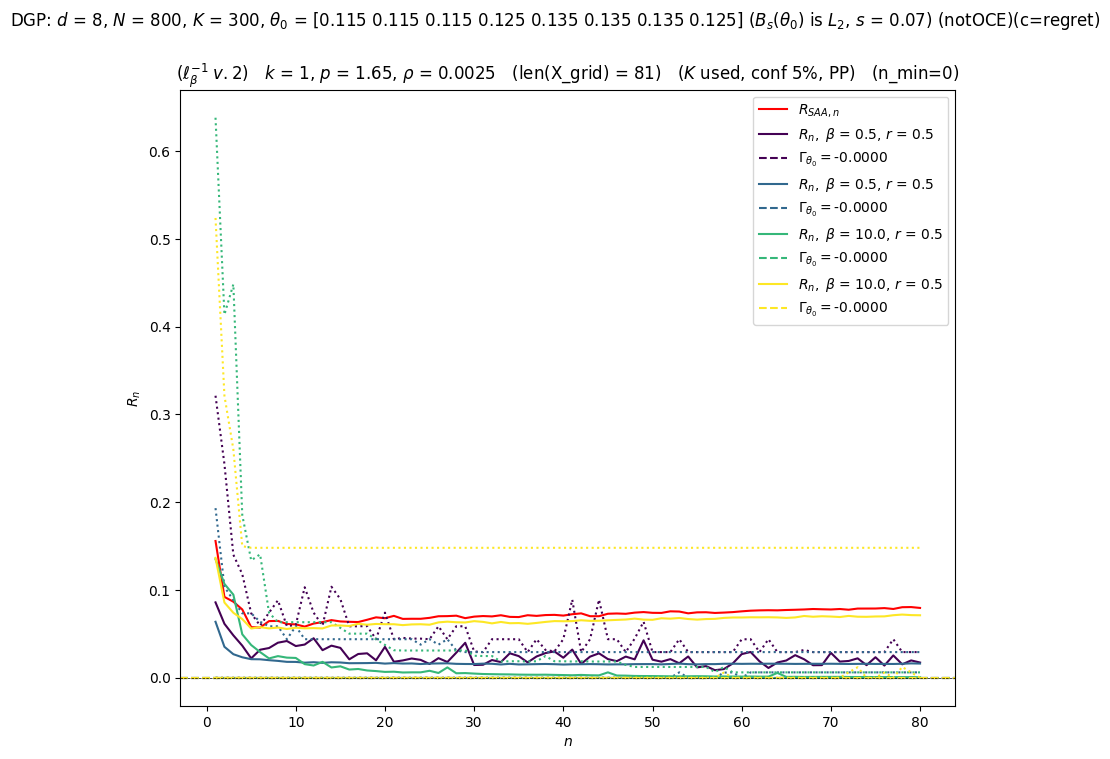


Conclusion
time_stamp_str = 30062025_010329


In [ ]:
if run_plot_4:
    print_select()
    from joblib import Parallel, delayed
    from tqdm.notebook import tqdm #
    from tqdm_joblib import tqdm_joblib #
    print(dim_par_string)
    print(" ")

    ## INPUT set number of parallel processses 
    PP_n_jobs = 6 # 4

    ## INPUT set parameter values ...
    # ... fix single valued
    k = k_theta_zero 
    p = p_theta_zero 
    rho = rho_theta_zero 
    title_string_pars = r"$k$ = "+f"{k}"+r", $p$ = "+f"{p}"+r", $\rho$ = "+f"{rho}"

    # ... multi-input
    beta_vals = [0.5, 0.5, 10.0, 10.0]
    r_vals = [0.5]*len(beta_vals)

    ## INPUT define the cost function
    cost = def_cost(k = k, p = p, rho = rho)

    ## INPUT define the grid
    step_size = 0.1
    alpha_two = d
    X_grid = np.arange(0,alpha_two+step_size,step_size)
    M = len(X_grid)

    ## INPUT define the grid for g = regret
    step_size_regret = 0.05
    alpha_two_regret = d
    X_grid_regret = np.arange(0,alpha_two_regret+step_size_regret,step_size_regret)
    M_regret = len(X_grid_regret)
    # X_grid_regret = X_grid

    ## INPUT specify inv_ell_explin version
    version = 2

    ## INPUT set rate function
    rate_fct_list = [WC_buildin_rel_entr, buildin_rel_entr, WC_buildin_rel_entr, buildin_rel_entr]
    print('rate_fct_list = [WC_buildin_rel_entr, buildin_rel_entr]')
    print('')
    title_string_invell = r"$\ell^{-1}_{\beta}\; v.$"+f"{version}"

    ## INPUT specify scipy.optimize.minimize settings w.r.t. theta
    constraints_theta = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    bounds_theta = [(eps_theta, None)]*d

    ## INPUT specify constraints for scipy.optimize.minimize w.r.t. x
    constraints_x = False
    bounds_x = [(0, d)]

    ## INPUT confidence intervals
    conf_int = True
    conf_percentage = 5

    ################################
    ### End of INPUT ###############
    ################################
    # rest cell #SAME# across consistency_general

    # safeguards
    if not (len(beta_vals) == len(r_vals)):
        sys.exit("Error: The variables beta_vals and r_vals must have the same length.")
    else:
        num_vals = len(beta_vals)

    # define R function
    minX_c_theta_zero = compute_minX_c_theta(cost, theta_zero, constraints_x = constraints_x, bounds_x = bounds_x)
    R = def_R(cost, minX_c_theta_zero, theta_zero = theta_zero)

    # define other functions
    approx_min_c_object = def_approx_min_c_object(cost)

    # if type_regret = True: replace the cost by regret (note that cost_exec is the "cost function" used in all what follows (except SAA))
    if type_regret:
        cost_exec = def_regret(cost, X_grid_regret)
    else:
        cost_exec = cost


    #### SAA
    start_time_SAA = time.time()
    ## Define function for parallel processing (replacing the "for n in range(N):" loop
    def compute_R_SAAns(Z_n_Klist):
        """
        Args:
            Z_n_Klist: List of K samples for Z_n with fixed n.
        """
        ## initialize lists for the K-loop
        R_SAAn_Klist = []
        for k_index in range(K):
            Z_n = Z_n_Klist[k_index]
            
            ## SAA method: compute respective R_SAAn with z = Z_n
            np.random.seed(42+1000 + k_index)
            x_initial = sample_x_inital(seed_num = 42+1000 + k_index)
            result_SAA = approx_min_c_object(Z_n,x_initial, constraints_x = constraints_x, bounds_x = bounds_x)
            R_SAAn_Klist += [R(result_SAA.x)]

            # cost_evals = cost_exec(X_grid,Z_n) ##
            # min_index = np.argmin(cost_evals) ##
            # R_SAAn_Klist += [R(X_grid[min_index])] ##
            
        R_SAAn = np.mean(R_SAAn_Klist)
        R_SAAn_upper = np.percentile(R_SAAn_Klist, 100-conf_percentage)
        R_SAAn_lower = np.percentile(R_SAAn_Klist, conf_percentage)

        return R_SAAn_Klist, R_SAAn, R_SAAn_upper, R_SAAn_lower  # Multiple outputs as a tuple

    if __name__ == "__main__":
        # Input data
        inputs = Z_path_N_K_list  # Numbers to compute

        # Use joblib for parallel processing
        results = Parallel(n_jobs=PP_n_jobs)(
            delayed(compute_R_SAAns)(list_n) for list_n in inputs
        )

        # Unpack the multiple outputs
        R_SAAn_Klist_list, R_SAAn_list, R_SAAn_upper_list, R_SAAn_lower_list = zip(*results)

        print(f"R_SAAn_list[0:10] = {R_SAAn_list[0:10]}")
        print(f"max(R_SAAn_list[0:10]) = {max(R_SAAn_list[0:10])}")

    end_time_SAA = time.time()
    print_progress_generel("SAA", end_time_SAA, start_time_SAA, comment_str = "")
    print(" ")


    #### Our Method
    ## initialize lists for the J-loop
    R_infty_J = []
    R_n_Klist_list_J = []
    R_n_list_J = []
    R_n_upper_list_J = []
    R_n_lower_list_J = []

    for j, beta, r in zip(range(num_vals),beta_vals, r_vals):
        start_time_j = time.time()

        rate_fct = rate_fct_list[j]

        ## compute R_{\infty}'s
        X_Z_inf = compute_X_Z_inf_grid(X_grid, theta_zero, cost_exec, beta, version, r, rate_fct, constraints_theta, bounds_theta)
        R_infty = R(X_Z_inf)
        R_infty_J += [R_infty]
        print(f"R_infty = {R_infty}")

        ## Define function for parallel processing (replacing the "for n in range(N):" loop)
        def compute_R_ns(Z_n_Klist):
            """
            Args:
                Z_n_Klist: List of K samples for Z_n with fixed n.
            """
            ## initialize lists for the K-loop
            R_n_Klist = []

            for k_index in range(K):
                Z_n = Z_n_Klist[k_index]

                ## approximate X_z with z = Z_n and compute respective R_n (with respective inv_ell)
                X_Z_n = compute_X_Z_n_grid(X_grid, k_index, Z_n, cost_exec, beta, version, r, rate_fct, constraints_theta, bounds_theta)
                R_n_Klist += [R(X_Z_n)]
            
            R_n = np.mean(R_n_Klist)
            R_n_upper = np.percentile(R_n_Klist, 100-conf_percentage)
            R_n_lower = np.percentile(R_n_Klist, conf_percentage)

            return R_n_Klist, R_n, R_n_upper, R_n_lower  # Multiple outputs as a tuple

        if __name__ == "__main__":
            # Input data
            inputs = Z_path_N_K_list  # Numbers to compute

            # Use joblib for parallel processing
            # results = Parallel(n_jobs=PP_n_jobs)(
            #     delayed(compute_R_ns)(list_n) for list_n in inputs
            # )
            with tqdm_joblib(tqdm(desc="Parallel Jobs", total=len(inputs))) as progress_bar:
                results = Parallel(n_jobs=PP_n_jobs)(
                    delayed(compute_R_ns)(list_n) for list_n in inputs
                )

            # Unpack the multiple outputs
            R_n_Klist_list, R_n_list, R_n_upper_list, R_n_lower_list = zip(*results)

            R_n_Klist_list_J += [R_n_Klist_list]
            R_n_list_J += [R_n_list]
            R_n_upper_list_J += [R_n_upper_list]
            R_n_lower_list_J += [R_n_lower_list]

            print(f"R_n_list[0:10] = {R_n_list[0:10]}")
            print(f"max(R_n_list[0:10]) = {max(R_n_list[0:10])}")

        end_time_j = time.time()
        print_progress_j(j,end_time_j, start_time_j, comment_str_j = f" (beta = {beta}, r = {r})")
        print(" ")


    ## Plot
    title_string_final = create_title_string_final_gridX(title_string_invell, title_string_pars, X_grid, conf_percentage)
    create_plot_PP(num_vals, conf_int, R_SAAn_list, R_SAAn_upper_list, R_SAAn_lower_list, beta_vals, r_vals, R_n_list_J, R_n_upper_list_J, R_n_lower_list_J, R_infty_J, title_string_final, fig_size = (10, 8), n_min = 0)

    print_conclusion()

else:
    print(f"run_plot_4 = {run_plot_4}; hence, cell not executed")

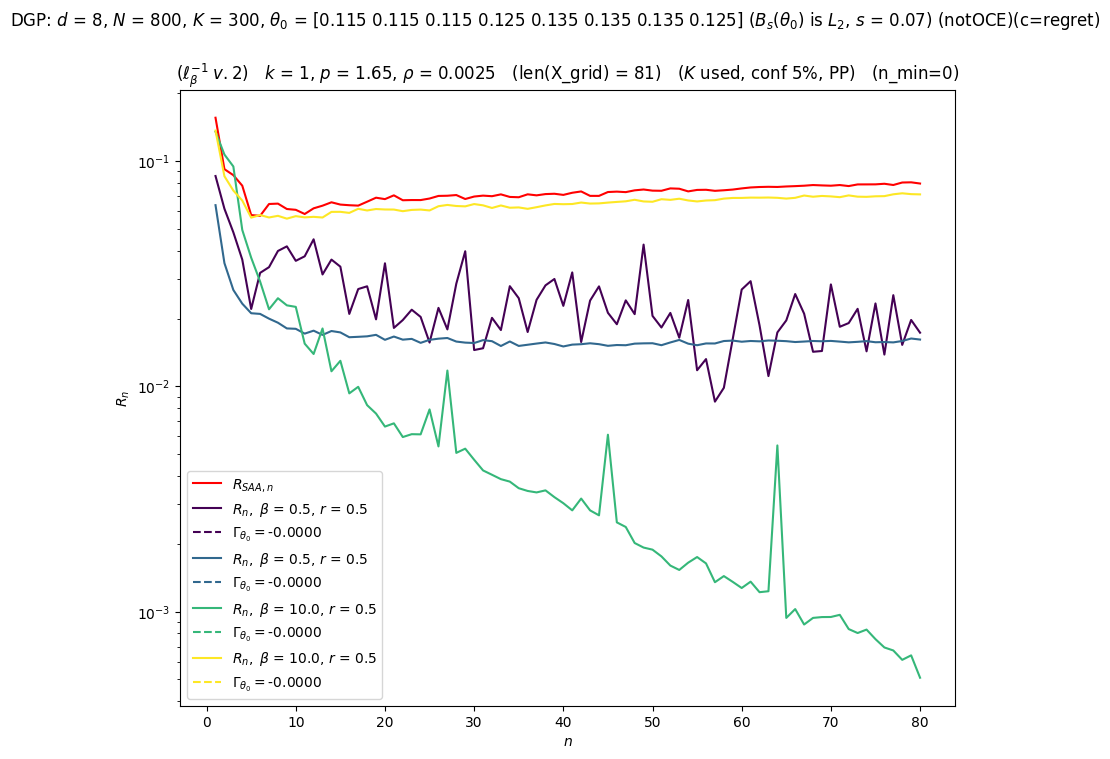

(np.float64(0.08583399966844171), np.float64(0.06142849966844176), np.float64(0.048273249668441785), np.float64(0.03653558300177512), np.float64(0.022055583001775108), np.float64(0.03189874966844177), np.float64(0.033816249668441774), np.float64(0.03990358300177511), np.float64(0.04183208300177511), np.float64(0.03607941633510845), np.float64(0.03778658300177511), np.float64(0.044959166335108464), np.float64(0.03138958300177513), np.float64(0.036537166335108465), np.float64(0.03398766633510847), np.float64(0.020969749668441798), np.float64(0.027038083001775112), np.float64(0.02780899966844178), np.float64(0.01983649966844179), np.float64(0.03517641633510845), np.float64(0.018171583001775123), np.float64(0.01969608300177513), np.float64(0.02189158300177513), np.float64(0.020335666335108436), np.float64(0.015649833001775124), np.float64(0.02230424966844178), np.float64(0.017900166335108422), np.float64(0.028570249668441777), np.float64(0.03979708300177513), np.float64(0.01449574966844179

In [16]:
create_plot_PP(num_vals, False, R_SAAn_list, R_SAAn_upper_list, R_SAAn_lower_list, beta_vals, r_vals, R_n_list_J, R_n_upper_list_J, R_n_lower_list_J, R_infty_J, title_string_final, fig_size = (10, 8), n_min = 0, yscale_log=True)
print(R_n_list_J[0])

## Plot 6:

In [ ]:
if run_plot_6:
    print_select()


    print_conclusion()

else:
    print(f"run_plot_6 = {run_plot_6}; hence, cell not executed")

run_plot_6 = False; hence, cell not executed


## Plot 10: withOUT gridX - $R_\infty$ vs. $\beta$

In [ ]:
if run_plot_10:
    print_select()
    

    print_conclusion()

else:
    print(f"run_plot_10 = {run_plot_10}; hence, cell not executed")

run_plot_10 = False; hence, cell not executed


## Plot 14:  K withOUT gridX - Parallel Processing (PP)

In [ ]:
if run_plot_14:
    print_select()
    from joblib import Parallel, delayed
    print(dim_par_string)
    print(" ")

    ## INPUT set number of parallel processses 
    PP_n_jobs = 6 # 4

    ## INPUT set parameter values ...
    # ... fix single valued
    rho = rho_default
    title_string_pars = r"$\rho$ = "+f"{rho}" 

    # ... multi-input
    beta_vals = [20.0, 25.0]
    r_vals = [0.5]*len(beta_vals)

    ## INPUT define the cost function
    cost = def_cost(rho = rho)

    ## INPUT specify inv_ell_explin version
    version = 2

    ## INPUT set rate function
    rate_fct = buildin_rel_entr
    title_string_invell = r"$\ell^{-1}_{\beta}\; v.$"+f"{version}"

    ## INPUT specify scipy.optimize.minimize settings w.r.t. theta
    constraints_theta = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    bounds_theta = [(0, None)]*d

    ## INPUT specify constraints for scipy.optimize.minimize w.r.t. x
    bounds_x = [(0, d)]

    ## INPUT confidence intervals
    conf_int = True
    conf_percentage = 5

    ################################
    ### End of INPUT ###############
    ################################
    # rest cell #SAME# across consistency_general

    # safeguards
    if not (len(beta_vals) == len(r_vals)):
        sys.exit("Error: The variables beta_vals and r_vals must have the same length.")
    else:
        num_vals = len(beta_vals)

    # define R & argmin_c function
    argmin_c = def_argmin_c(rho = rho_default)
    R = def_R(cost, argmin_c, theta_zero = theta_zero)

    # define other functions
    

    # if type_regret = True: replace the cost by regret (note that cost_exec is the "cost function" used in all what follows)
    if type_regret:
        cost_exec = def_regret(cost, X_grid)
    else:
        cost_exec = cost


    #### SAA
    start_time_SAA = time.time()
    ## Define function for parallel processing (replacing the "for n in range(N):" loop
    def compute_R_SAAns(Z_n_Klist):
        """
        Args:
            Z_n_Klist: List of K samples for Z_n with fixed n.
        """
        ## initialize lists for the K-loop
        R_SAAn_Klist = []
        for k_index in range(K):
            Z_n = Z_n_Klist[k_index]
            
            ## SAA method: compute respective R_SAAn with z = Z_n
            R_SAAn_Klist += [R(argmin_c(Z_n))]
        R_SAAn = np.mean(R_SAAn_Klist)
        R_SAAn_upper = np.percentile(R_SAAn_Klist, 100-conf_percentage)
        R_SAAn_lower = np.percentile(R_SAAn_Klist, conf_percentage)

        return R_SAAn, R_SAAn_upper, R_SAAn_lower  # Multiple outputs as a tuple

    if __name__ == "__main__":
        # Input data
        inputs = Z_path_N_K_list  # Numbers to compute

        # Use joblib for parallel processing
        results = Parallel(n_jobs=PP_n_jobs)(
            delayed(compute_R_SAAns)(list_n) for list_n in inputs
        )

        # Unpack the multiple outputs
        R_SAAn_list, R_SAAn_upper_list, R_SAAn_lower_list = zip(*results)

        print(f"R_SAAn_list[0:10] = {R_SAAn_list[0:10]}")
        print(f"max(R_SAAn_list[0:10]) = {max(R_SAAn_list[0:10])}")

    end_time_SAA = time.time()
    print_progress_generel("SAA", end_time_SAA, start_time_SAA, comment_str = "")
    print(" ")


    #### Our Method
    ## initialize lists for the J-loop
    R_infty_J = []
    R_n_list_J = []
    R_n_upper_list_J = []
    R_n_lower_list_J = []

    for j, beta, r in zip(range(num_vals),beta_vals, r_vals):
        start_time_j = time.time()

        ## compute R_{\infty}'s
        theta_Z_inf = compute_theta_Z_inf(theta_zero, cost_exec, argmin_c, beta, version, r, rate_fct, constraints_theta, bounds_theta)
        R_infty = R(argmin_c(theta_Z_inf))
        R_infty_J += [R_infty]
        print(f"R_infty = {R_infty}")

        ## Define function for parallel processing (replacing the "for n in range(N):" loop)
        def compute_R_ns(Z_n_Klist):
            """
            Args:
                Z_n_Klist: List of K samples for Z_n with fixed n.
            """
            ## initialize lists for the K-loop
            R_n_Klist = []

            for k_index in range(K):
                Z_n = Z_n_Klist[k_index]

                ## approximate X_z with z = Z_n and compute respective R_n (with respective inv_ell)
                theta_Z_n = compute_theta_Z_n(k_index, Z_n, cost_exec, argmin_c, beta, version, r, rate_fct, constraints_theta, bounds_theta)
                R_n_Klist += [R(argmin_c(theta_Z_n))]
            
            R_n = np.mean(R_n_Klist)
            R_n_upper = np.percentile(R_n_Klist, 100-conf_percentage)
            R_n_lower = np.percentile(R_n_Klist, conf_percentage)

            return R_n, R_n_upper, R_n_lower  # Multiple outputs as a tuple

        if __name__ == "__main__":
            # Input data
            inputs = Z_path_N_K_list  # Numbers to compute

            # Use joblib for parallel processing
            results = Parallel(n_jobs=PP_n_jobs)(
                delayed(compute_R_ns)(list_n) for list_n in inputs
            )

            # Unpack the multiple outputs
            R_n_list, R_n_upper_list, R_n_lower_list = zip(*results)

            R_n_list_J += [R_n_list]
            R_n_upper_list_J += [R_n_upper_list]
            R_n_lower_list_J += [R_n_lower_list]

            print(f"R_n_list[0:10] = {R_n_list[0:10]}")
            print(f"max(R_n_list[0:10]) = {max(R_n_list[0:10])}")

        end_time_j = time.time()
        print_progress_j(j,end_time_j, start_time_j, comment_str_j = f" (beta = {beta}, r = {r})")
        print(" ")


    ## Plot
    title_string_final = create_title_string_final_nogridX(title_string_invell, title_string_pars, conf_percentage)
    create_plot_PP(num_vals, conf_int, R_SAAn_list, R_SAAn_upper_list, R_SAAn_lower_list, beta_vals, r_vals, R_n_list_J, R_n_upper_list_J, R_n_lower_list_J, R_infty_J, title_string_final, fig_size = (10, 8), n_min = 0)

    print_conclusion()

else:
    print(f"run_plot_14 = {run_plot_14}; hence, cell not executed")

run_plot_14 = False; hence, cell not executed
